# Netflix vs. Disney Quarterly Returns Data



* Netflix (NASDAQ:NFLX)
* Disney (NYSE:DIS)


Raw data: overall and individual plots, mean quarterly returns, and the covariance and correlation between Netflix and Disney.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import random
from pandas_datareader import data as web

In [2]:
# tickers in a list
symbols = ['NFLX','DIS']
# set dates: 1 year
start_date = "2019-08-13" 
end_date = "2020-08-12" 
# extract data from yahoo
stock_data = web.get_data_yahoo(symbols,start_date,end_date)

# show data
print(stock_data['Adj Close'].head(3)) # choose the Adj Close attribute table and show the first 3 rows

Symbols            DIS        NFLX
Date                              
2019-08-12  134.941528  310.829987
2019-08-13  136.194016  312.279999
2019-08-14  132.058807  299.109985


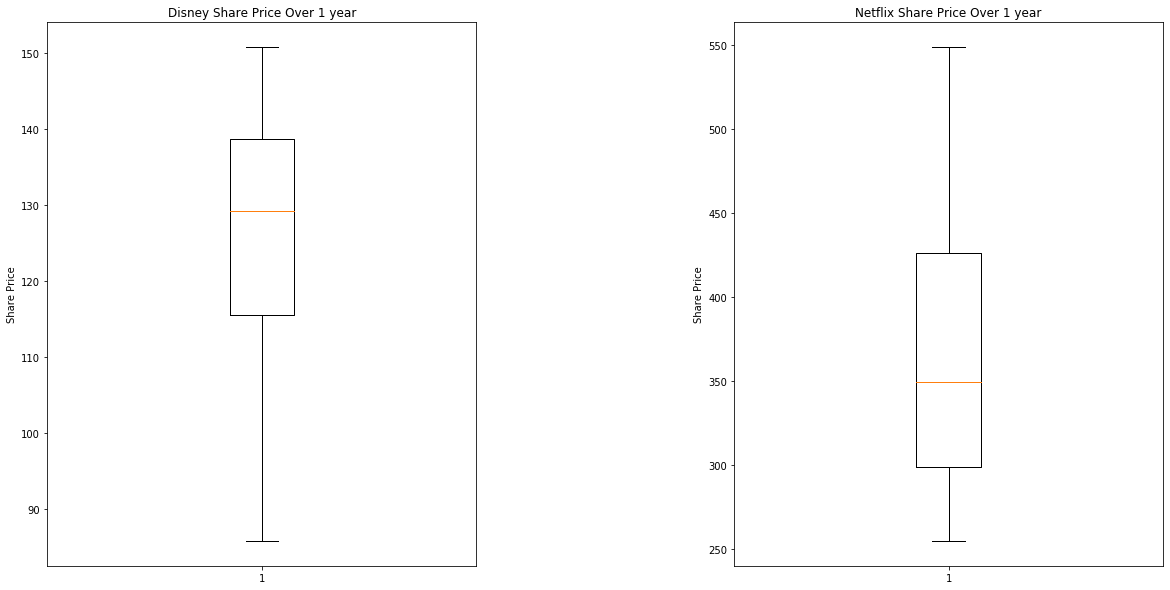

In [3]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.boxplot(stock_data['Adj Close']['DIS'])
plt.title("Disney Share Price Over 1 year")
plt.ylabel("Share Price")
plt.subplot(1,2,2)
plt.boxplot(stock_data['Adj Close']['NFLX'])
plt.title("Netflix Share Price Over 1 year")
plt.ylabel("Share Price")
plt.subplots_adjust(hspace = 0.3,wspace = 0.6)
plt.show()

Symbols            DIS        NFLX
Date                              
2019-08-12  134.941528  310.829987
2019-11-12  137.754684  292.010010
2020-02-12  141.850006  380.010010
2020-05-12  104.559998  431.820007
2020-08-12  131.820007  475.630005


<Figure size 1440x720 with 0 Axes>

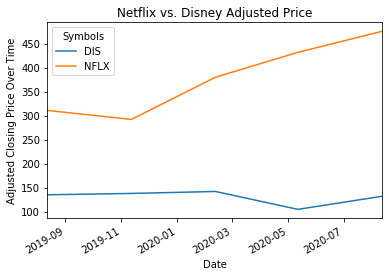

In [4]:
pd.set_option('mode.chained_assignment', None) # ignore warning
# drop all rows if the date is not every 3 months to find quarterly share price
stock_data_adj = stock_data['Adj Close'] # Adjusted Close is the most accurate stock price
for index,row in stock_data_adj.iterrows():
    current_date = str(index.date())
    current_date_day = str(index.date())[-2:]
    if(current_date != "2019-08-12" and current_date != "2019-11-12" and current_date != "2020-02-12" and
      current_date != "2020-05-12" and current_date != "2020-08-12"):
        stock_data_adj.drop(index,inplace = True)

print(stock_data_adj)
plt.figure(figsize = (20,10))
stock_data_adj.plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price Over Time")
plt.title("Netflix vs. Disney Adjusted Price")
plt.show()

Symbols          DIS      NFLX
Date                          
2019-08-12       NaN       NaN
2019-11-12  0.020847 -0.060547
2020-02-12  0.029729  0.301360
2020-05-12 -0.262883  0.136339
2020-08-12  0.260712  0.101454


<Figure size 1440x720 with 0 Axes>

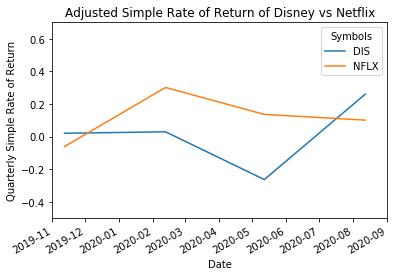

<Figure size 1152x648 with 0 Axes>

In [5]:
quarterly_simple_ror = stock_data_adj.pct_change() # calculating quarterly returns
print(quarterly_simple_ror)
plt.figure(figsize = (20,10))
quarterly_simple_ror.plot()
plt.xlabel("Date")
plt.ylabel("Quarterly Simple Rate of Return")
plt.title("Adjusted Simple Rate of Return of Disney vs Netflix")
plt.xlim("2019-11","2020-09")
plt.ylim(-0.5,0.7)
plt.figure(figsize=(16,9))
plt.show()

Symbols
DIS     0.012101
NFLX    0.119651
dtype: float64


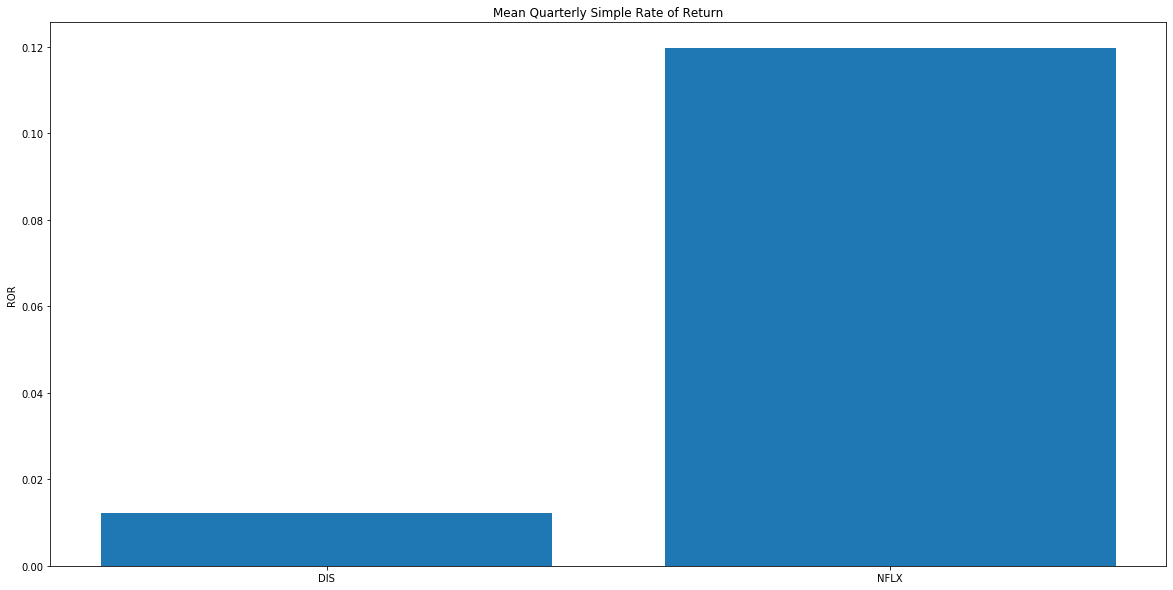

In [6]:
# step 1
mean_return = quarterly_simple_ror.mean()
print(mean_return)
# step 2 or use mean_return.keys() as the first bar chart arguement
plt.figure(figsize = (20,10))
plt.bar(mean_return.keys(),mean_return)
plt.ylabel("ROR")
plt.title("Mean Quarterly Simple Rate of Return")
plt.show()

Symbols
DIS     0.045937
NFLX    0.022033
dtype: float64


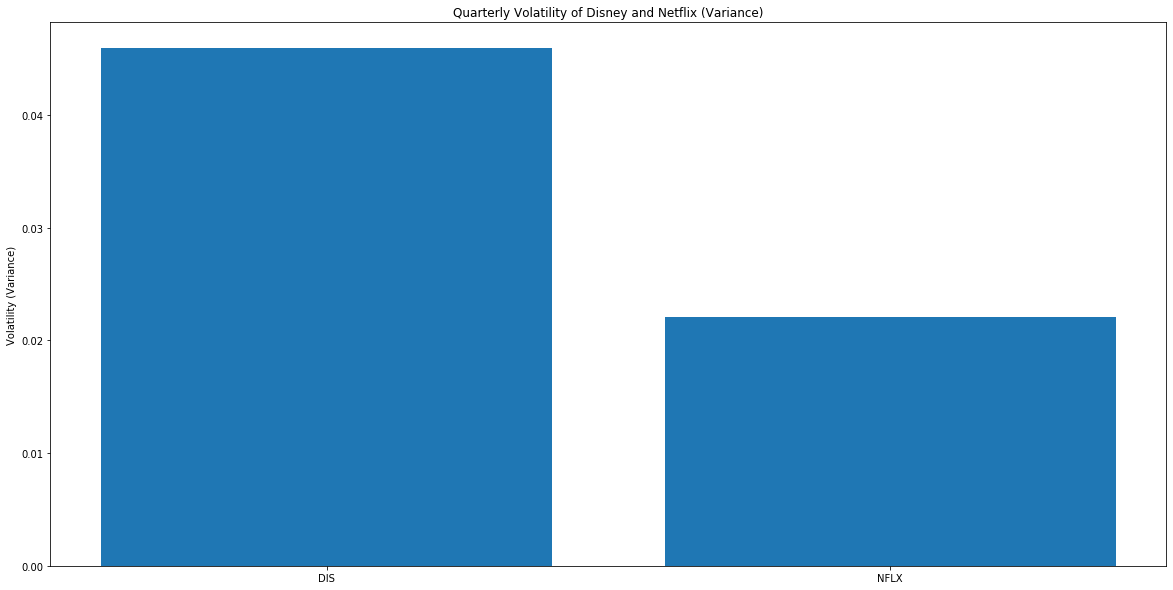

In [7]:
var_return = quarterly_simple_ror.var() # calculate quarterly variance
print(var_return)
plt.figure(figsize = (20,10))
plt.bar(quarterly_simple_ror.keys(),var_return)
plt.title("Quarterly Volatility of Disney and Netflix (Variance)")
plt.ylabel("Volatility (Variance)")
plt.show()

Symbols
DIS     0.214329
NFLX    0.148435
dtype: float64


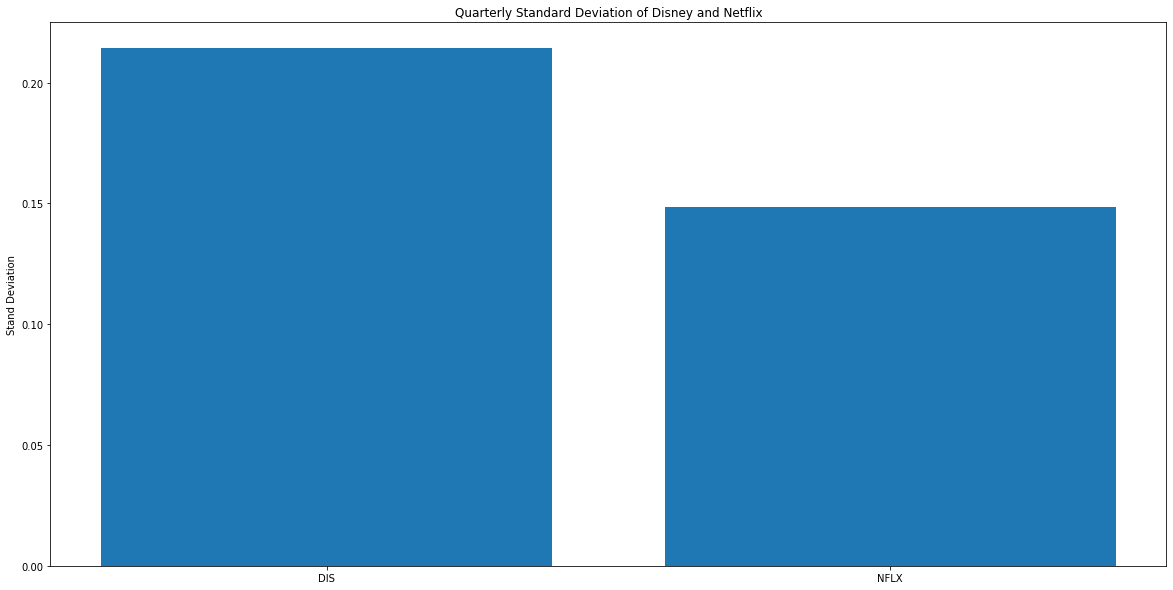

In [8]:
sd_return = quarterly_simple_ror.std() # calculate quarterly standard deviation
print(sd_return)
plt.figure(figsize = (20,10))
plt.bar(quarterly_simple_ror.keys(),sd_return)
plt.title("Quarterly Standard Deviation of Disney and Netflix")
plt.ylabel("Stand Deviation")
plt.show()

In [9]:
cov_matrix = quarterly_simple_ror.cov() # covariance matrix
print(cov_matrix)

Symbols       DIS      NFLX
Symbols                    
DIS      0.045937 -0.002495
NFLX    -0.002495  0.022033


In [10]:
corr_matrix = quarterly_simple_ror.corr() # correlation matrix
print(corr_matrix)

Symbols       DIS      NFLX
Symbols                    
DIS      1.000000 -0.078431
NFLX    -0.078431  1.000000
